# First part

## see the data

In [1]:
import pandas as pd
import pandas as pd

file = "data/raw/ObesityDataSet_raw_and_data_sinthetic.csv"
data = pd.read_csv(file)

train = pd.read_csv("../data/processed/train.csv")
val   = pd.read_csv("../data/processed/validation.csv")
test  = pd.read_csv("../data/processed/test.csv")

print("Train shape:", train.shape)
print("Validation shape:", val.shape)
print("Test shape:", test.shape)

print("Train class distribution:\n", train["Obesity"].value_counts(normalize=True))
print("Validation class distribution:\n", val["Obesity"].value_counts(normalize=True))
print("Test class distribution:\n", test["Obesity"].value_counts(normalize=True))

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/ObesityDataSet_raw_and_data_sinthetic.csv'

In [ ]:
data.describe()

NameError: name 'data' is not defined

In [ ]:
data["CAEC"].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [ ]:
data["CALC"].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [ ]:
data["MTRANS"].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [ ]:
data["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

## Making data into numbers 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,1,no,2.000000,no,0.000000,1.000000,0,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,1,yes,3.000000,yes,3.000000,0.000000,1,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,1,no,2.000000,no,2.000000,1.000000,2,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,1,no,2.000000,no,2.000000,0.000000,2,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,1,no,2.000000,no,0.000000,0.000000,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,1,no,1.728139,no,1.676269,0.906247,1,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,1,no,2.005130,no,1.341390,0.599270,1,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,1,no,2.054193,no,1.414209,0.646288,1,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,1,no,2.852339,no,1.139107,0.586035,1,Public_Transportation,Obesity_Type_III


In [ ]:
import pandas as pd

file = "data/raw/ObesityDataSet_raw_and_data_sinthetic.csv"
data = pd.read_csv(file)

# --- small helper to avoid NaNs from case/space mismatches ---
def norm(s: pd.Series) -> pd.Series:
    return s.astype("string").str.normalize("NFKC").str.strip().str.lower()

# Normalize relevant text columns once (no change to numeric cols)
for col in ["CAEC","CALC","Gender","NObeyesdad","family_history_with_overweight","FAVC","SMOKE","SCC","MTRANS"]:
    if col in data.columns:
        data[col] = norm(data[col])

# Mappings in lowercase to match normalization
caec_calc_mapping = {
    'no': 0,
    'sometimes': 1,
    'frequently': 2,
    'always': 3
}

data['CAEC'] = data['CAEC'].map(caec_calc_mapping)
data['CALC'] = data['CALC'].map(caec_calc_mapping)

obesity_mapping = {
    "insufficient_weight": 0,
    "normal_weight": 1,
    "overweight_level_i": 2,
    "overweight_level_ii": 3,
    "obesity_type_i": 4,
    "obesity_type_ii": 5,
    "obesity_type_iii": 6
}
data["Obesity"] = data["NObeyesdad"].map(obesity_mapping)

obi_g = {"male": 0, "female": 1}

# Convert binary 'yes'/'no' columns to 1/0 (after normalization)
binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_columns:
    if col in data.columns:
        data[col] = data[col].map({'yes': 1, 'no': 0}).astype('Int64')

# Identify categorical columns (excluding the target)
categorical_columns = ['MTRANS']

# One-hot encoding; force 0/1 ints
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=False, dtype=int)

# Optional: choose a reference category to drop for MTRANS
if "MTRANS_public_transportation" in data_encoded.columns:
    data_encoded.drop(["MTRANS_public_transportation"], axis=1, inplace=True)

# Re-apply mappings on encoded frame (kept from your code)
data_encoded["Obesity"] = data_encoded["NObeyesdad"].map(obesity_mapping)
data_encoded["Gender"] = data_encoded["Gender"].map(obi_g)

# Drop original categorical target text
data_encoded.drop("NObeyesdad", axis=1, inplace=True)

# Final NA check on the encoded dataframe
data_encoded.isna().sum()
data_encoded

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Obesity,MTRANS_automobile,MTRANS_bike,MTRANS_motorbike,MTRANS_walking
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,1,0,0,0,0
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1,0,0,0,0
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,1,0,0,0,0
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,2,0,0,0,1
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,6,0,0,0,0
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,6,0,0,0,0
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,6,0,0,0,0
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,6,0,0,0,0


## Coding with Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFClassifier
from sklearn.model_selection import train_test_split as split_data, RandomizedSearchCV as RandSearch
from sklearn.metrics import accuracy_score as acc_score, classification_report as class_report
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.pipeline import Pipeline
# Target: obesity levels

# define features and target
X, y = data_encoded.drop(columns=["Obesity", "Weight"]), data_encoded["Obesity"]

# split into train and test sets
X_train, X_test, y_train, y_test = split_data(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# build the unfitted RF
rf = RFClassifier(random_state=42)

In [ ]:
print("[INFO] Setting search space…")
parameters = {
    'n_estimators': [300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

[INFO] Setting search space…


In [ ]:
print("[INFO] Running RandomizedSearchCV…")
search = RandSearch(
    estimator=rf,
    param_distributions=parameters,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)
search.fit(X_train, y_train)

print(f"\nOptimal parameters: {search.best_params_}")
print(f"Best cross-validation accuracy: {search.best_score_:.4f}")

[INFO] Running RandomizedSearchCV…
Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\Renaux\Documents\TAED2-SmartHealth.AI\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Optimal parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best cross-validation accuracy: 0.8803



Assessing model performance on validation data…
Validation Accuracy: 0.8723
Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.68      0.77      0.72        62
           2       0.90      0.79      0.84        56
           3       0.81      0.78      0.80        50
           4       0.93      0.85      0.89        78
           5       0.89      0.95      0.92        58
           6       1.00      1.00      1.00        63

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423


Plotting confusion matrix…
Confusion matrix saved to 'confusion_matrix.png'

Visualizing top feature importances…
Feature importances saved to 'feature_importances.png'


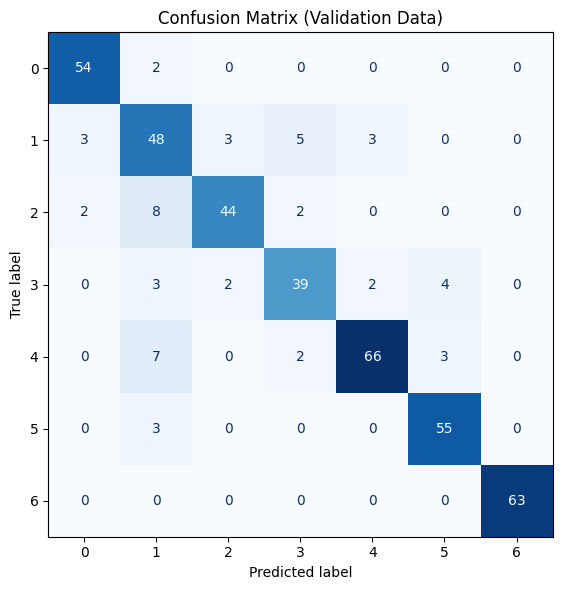

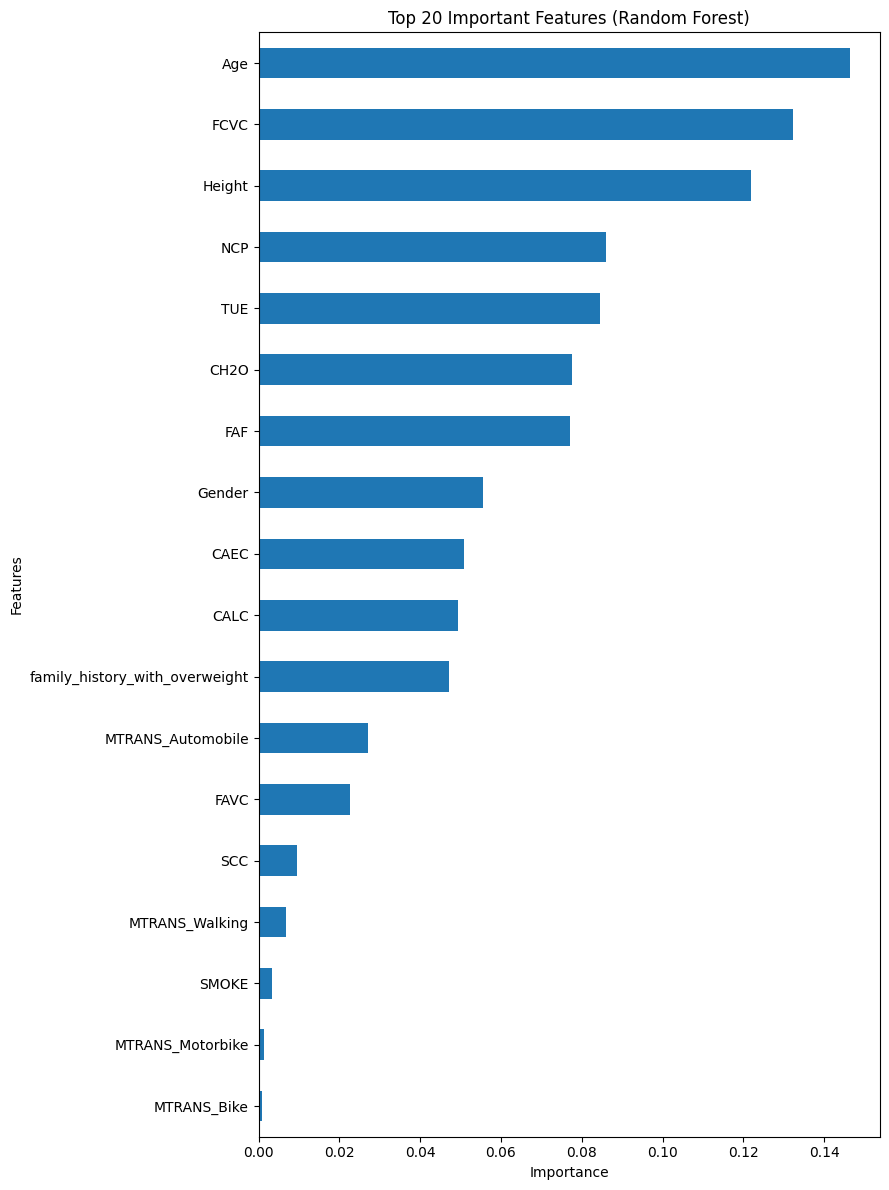

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

optimal_model: RFClassifier = search.best_estimator_

print("\nAssessing model performance on validation data…")
val_predictions = optimal_model.predict(X_test)
print(f"Validation Accuracy: {acc_score(y_test, val_predictions):.4f}")
print("Detailed Classification Report:")
print(class_report(y_test, val_predictions))

# ---------------- Confusion Matrix ----------------
print("\nPlotting confusion matrix…")
cm = confusion_matrix(y_test, val_predictions, labels=optimal_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=optimal_model.classes_)
fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax_cm, cmap="Blues", values_format="d", colorbar=False)
plt.title("Confusion Matrix (Validation Data)")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=200)
print("Confusion matrix saved to 'confusion_matrix.png'")

# ---------------- Feature Importances ----------------
print("\nVisualizing top feature importances…")
rf_best: RFClassifier = optimal_model

feat_names = X_train.columns
importances = rf_best.feature_importances_
topk = min(20, len(importances))
imp_series = pd.Series(importances, index=feat_names).nlargest(topk)

fig, ax = plt.subplots(figsize=(9, 12))
imp_series.sort_values().plot(kind='barh', ax=ax)
ax.set_title("Top 20 Important Features (Random Forest)")
ax.set_xlabel("Importance")
ax.set_ylabel("Features")
plt.tight_layout()
plt.savefig("feature_importances.png", dpi=200)
print("Feature importances saved to 'feature_importances.png'")
